In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-54.9606967600683 -32.50742548250264
-13.422070554404101 -50.962033558787425
26.131665786718145 73.9223701278996
54.71948259565653 67.66940372761661
61.748475138513555 -161.84934269739972
-69.41630101063188 -1.6973339559502563
-44.610750192669485 44.53682543485459
-76.60825339027512 -0.4925859526560714
-23.76186234785409 -159.99787838316317
-44.223803787878765 58.49635705599579
43.72638281147621 -117.84554806653448
-55.891357100274334 154.6810885864408
-87.69323638913296 112.6722112429004
-5.956259092091088 120.52477443373692
-32.75836658325778 -89.29867890493426
-1.0579520801446307 -97.2480765358838
38.74005188083689 110.19518806155236
85.83918437183289 40.34116798561044
28.67549999826892 173.01739881807998
89.21507098278957 -81.55946803557723
-35.162392469001 -59.976938002131675
-15.255839164939971 -0.6707319980914122
85.94011664864078 87.3147369388837
-12.699345773344916 -41.33389417172191
31.98468609288703 -74.36718343680604
19.579810067530417 144.50611450368683
-65.60664021275366 

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

630

In [7]:
import requests

requests.__version__

'2.27.1'

In [14]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

In [16]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | sao miguel do araguaia
Processing Record 3 of Set 1 | jaitaran
Processing Record 4 of Set 1 | petukhovo
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | ontario
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | tanete
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | dongsheng
Processing Record 17 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | chivilcoy
Processing Record 21 of Set 1 | jamestown

Processing Record 37 of Set 4 | bambanglipuro
Processing Record 38 of Set 4 | mokhotlong
Processing Record 39 of Set 4 | cape town
Processing Record 40 of Set 4 | akita
Processing Record 41 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 42 of Set 4 | puksoozero
Processing Record 43 of Set 4 | linxia
Processing Record 44 of Set 4 | husavik
Processing Record 45 of Set 4 | korla
Processing Record 46 of Set 4 | avera
Processing Record 47 of Set 4 | juifang
City not found. Skipping...
Processing Record 48 of Set 4 | bressanone
Processing Record 49 of Set 4 | wad madani
Processing Record 50 of Set 4 | fort nelson
Processing Record 1 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 5 | srednekolymsk
Processing Record 3 of Set 5 | goderich
Processing Record 4 of Set 5 | kirakira
Processing Record 5 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 5 | bredasdorp
Processing Record 7 of Set 5 | nanortalik
Processing Record 8 of Set

Processing Record 25 of Set 8 | antalya
Processing Record 26 of Set 8 | lamas
Processing Record 27 of Set 8 | nokaneng
Processing Record 28 of Set 8 | baranchinskiy
Processing Record 29 of Set 8 | christchurch
Processing Record 30 of Set 8 | ahmadpur
Processing Record 31 of Set 8 | samarai
Processing Record 32 of Set 8 | maceio
Processing Record 33 of Set 8 | mocambique
City not found. Skipping...
Processing Record 34 of Set 8 | zyryanka
Processing Record 35 of Set 8 | nakhon phanom
Processing Record 36 of Set 8 | port hedland
Processing Record 37 of Set 8 | palmer
Processing Record 38 of Set 8 | san isidro
Processing Record 39 of Set 8 | raisinghnagar
Processing Record 40 of Set 8 | katsuura
Processing Record 41 of Set 8 | gusinoye ozero
Processing Record 42 of Set 8 | san felipe
Processing Record 43 of Set 8 | oktyabrskiy
Processing Record 44 of Set 8 | kasongo-lunda
Processing Record 45 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 46 of Set 8 | hay river
Pro

Processing Record 12 of Set 12 | san juan
Processing Record 13 of Set 12 | bozuyuk
Processing Record 14 of Set 12 | pavilosta
Processing Record 15 of Set 12 | tolyatti
Processing Record 16 of Set 12 | zheleznodorozhnyy
Processing Record 17 of Set 12 | larap
Processing Record 18 of Set 12 | nakamura
Processing Record 19 of Set 12 | hongan
City not found. Skipping...
Processing Record 20 of Set 12 | burgeo
Processing Record 21 of Set 12 | rudnichnyy
Processing Record 22 of Set 12 | vila franca do campo
Processing Record 23 of Set 12 | nishihara
Processing Record 24 of Set 12 | nantucket
Processing Record 25 of Set 12 | poum
Processing Record 26 of Set 12 | los llanos de aridane
Processing Record 27 of Set 12 | waitati
Processing Record 28 of Set 12 | harrisonburg
Processing Record 29 of Set 12 | shubarshi
Processing Record 30 of Set 12 | medea
Processing Record 31 of Set 12 | novo oriente
Processing Record 32 of Set 12 | ebreichsdorf
Processing Record 33 of Set 12 | doha
Processing Recor

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.6971,-53.4616,47.03,84,51,5.14,UY,2022-08-01 01:51:26
1,Sao Miguel Do Araguaia,-13.2750,-50.1628,74.77,23,0,2.42,BR,2022-08-01 01:51:26
2,Jaitaran,26.2031,73.9364,79.54,84,50,15.41,IN,2022-08-01 01:51:26
3,Petukhovo,55.0692,67.9019,63.66,92,68,7.83,RU,2022-08-01 01:51:27
4,Bethel,41.3712,-73.4140,77.36,69,100,5.12,US,2022-08-01 01:51:27
5,Hermanus,-34.4187,19.2345,38.80,74,0,7.54,ZA,2022-08-01 01:51:27
6,Avarua,-21.2078,-159.7750,77.05,73,75,13.80,CK,2022-08-01 01:50:14
7,Ontario,34.0633,-117.6509,94.10,40,75,17.27,US,2022-08-01 01:47:03
8,Hobart,-42.8794,147.3294,54.27,61,40,14.97,AU,2022-08-01 01:51:28
9,Albany,42.6001,-73.9662,73.63,72,100,2.28,US,2022-08-01 01:51:28


In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2022-08-01 01:51:26,-33.6971,-53.4616,47.03,84,51,5.14
1,Sao Miguel Do Araguaia,BR,2022-08-01 01:51:26,-13.2750,-50.1628,74.77,23,0,2.42
2,Jaitaran,IN,2022-08-01 01:51:26,26.2031,73.9364,79.54,84,50,15.41
3,Petukhovo,RU,2022-08-01 01:51:27,55.0692,67.9019,63.66,92,68,7.83
4,Bethel,US,2022-08-01 01:51:27,41.3712,-73.4140,77.36,69,100,5.12
5,Hermanus,ZA,2022-08-01 01:51:27,-34.4187,19.2345,38.80,74,0,7.54
6,Avarua,CK,2022-08-01 01:50:14,-21.2078,-159.7750,77.05,73,75,13.80
7,Ontario,US,2022-08-01 01:47:03,34.0633,-117.6509,94.10,40,75,17.27
8,Hobart,AU,2022-08-01 01:51:28,-42.8794,147.3294,54.27,61,40,14.97
9,Albany,US,2022-08-01 01:51:28,42.6001,-73.9662,73.63,72,100,2.28


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

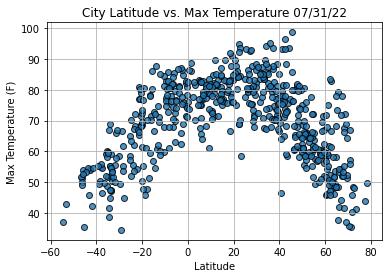

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

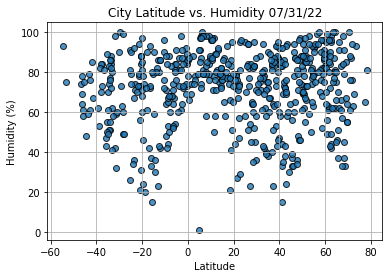

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

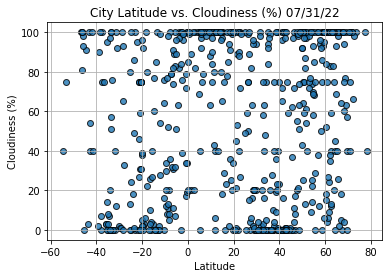

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

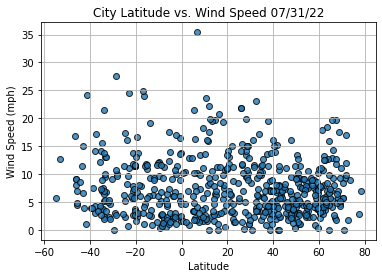

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()